## Mid-Term 1

Welcome to your Mid-Term task.
<br/> You have these tasks to complete this assignment:
<br/> 1. Perform Data Exploration
<br/> 2. Perform Feature Engineering 
<br/> 3. Choose a model of classifier and explain your choice 
<br/> 4. Train your model and use it to classify test dataset
<br/> 5. Measure your results

!Remember the midterm is time limited 

The data you have to deal with is about - well logs (каротаж, разновидность геофизических исследований скважин)

### Importing basic packages, add your needed ones if necessary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load training data

In [2]:
data = pd.read_csv('train_midterm.csv')
data.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-15,2343.304000,436806.46875,6463010.5,-2318.007324,ROGALAND GP.,Lista Fm.,14.882113,0.77124,0.771240,...,12.761565,NaN,2.632109,0.115312,0.143792,NaN,NaN,0.57085,65000,1.0
1,35/3-7 S,3582.467851,543919.75000,6856653.5,-3477.858154,CROMER KNOLL GP.,Roedby Fm.,8.645628,NaN,5.599961,...,10.556081,150.206314,NaN,-0.007215,NaN,6.627153,10.410796,NaN,65000,1.0
2,25/9-1,734.814000,483545.34375,6590313.0,-709.762207,NORDLAND GP.,Utsira Fm.,NaN,NaN,NaN,...,109.271744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65030,1.0
3,25/3-1,1075.968000,487291.25000,6643945.0,-1053.937988,HORDALAND GP.,NaN,17.646826,NaN,0.867609,...,7.970956,NaN,0.215513,0.051340,0.958611,NaN,NaN,NaN,30000,1.0
4,35/9-10 S,3580.061600,537897.75000,6791142.5,-3069.179688,BAAT GP.,Rannoch Fm.,8.572706,NaN,7.634528,...,31.773550,140.671463,NaN,0.039784,NaN,NaN,NaN,NaN,65000,1.0


The data contains the metadata columns
* WELL: well name
* DEPTH_MD: measured depth
* X_LOC: UTM X coordinate 
* Y_LOC: UTM Y coordinate
* Z_LOC: DEPTH
* GROUP: NPD lithostratigraphy group
* FORMATION: NPD lithostratgraphy formation

The data contains the well log curves. For example the following:
* BS: Bit Size
* CALI: Caliper
* RDEP: Deep Resistivity
* RHOB: Bulk Density
* GR: Raw gamma data
* SGR: Spectral Gamma Ray
* RMED: Medium Resistivity
* ROP: Rate of Penetration
* NPHI: Neutron Porosity
* PEF: Photoelectric Absorption Factor
* RSHA: Shallow Resistivity
* DTS: Sonic (Sheer Slowness)
* DTC: Sonic (Compressional Slowness)

as well as the interpretation

* FORCE_2020_LITHOFACIES_LITHOLOGY: lithology class label
* FORCE_2020_LITHOFACIES_CONFIDENCE: confidence in lithology interpretation (1: high, 2: medium, 3: low)

The LITHOLOGY column contains the interpretation. Each number corresponds to a lithology class, given by the following list:
<br/>
30000: Sandstone<br/>
65030: Sandstone/Shale<br/>
65000: Shale<br/>
80000: Marl<br/>
74000: Dolomite<br/>
70000: Limestone<br/>
70032: Chalk<br/>
88000: Halite<br/>
86000: Anhydrite<br/>
99000: Tuff<br/>
90000: Coal<br/>
93000: Basement<br/>

### Data Explotarion

In [3]:
data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-15,2343.304000,436806.46875,6463010.5,-2318.007324,ROGALAND GP.,Lista Fm.,14.882113,0.771240,0.771240,...,12.761565,NaN,2.632109,0.115312,0.143792,NaN,NaN,0.570850,65000,1.0
1,35/3-7 S,3582.467851,543919.75000,6856653.5,-3477.858154,CROMER KNOLL GP.,Roedby Fm.,8.645628,NaN,5.599961,...,10.556081,150.206314,NaN,-0.007215,NaN,6.627153,10.410796,NaN,65000,1.0
2,25/9-1,734.814000,483545.34375,6590313.0,-709.762207,NORDLAND GP.,Utsira Fm.,NaN,NaN,NaN,...,109.271744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65030,1.0
3,25/3-1,1075.968000,487291.25000,6643945.0,-1053.937988,HORDALAND GP.,NaN,17.646826,NaN,0.867609,...,7.970956,NaN,0.215513,0.051340,0.958611,NaN,NaN,NaN,30000,1.0
4,35/9-10 S,3580.061600,537897.75000,6791142.5,-3069.179688,BAAT GP.,Rannoch Fm.,8.572706,NaN,7.634528,...,31.773550,140.671463,NaN,0.039784,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292623,16/7-5,2058.431985,446269.75000,6468389.5,-2031.546509,HORDALAND GP.,Skade Fm.,12.615398,0.567303,0.537278,...,5.950200,NaN,NaN,0.020284,1.126368,NaN,NaN,NaN,65000,2.0
292624,25/7-2,3029.760000,454816.71875,6571015.0,-3003.986084,SHETLAND GP.,Kyrre Fm.,13.617200,6.817722,3.079901,...,6.545644,NaN,1.367200,-0.003809,NaN,5.577710,NaN,5.546608,80000,1.0
292625,16/10-1,1738.407790,444152.00000,6435554.0,-1713.335327,HORDALAND GP.,Utsira Fm.,20.242147,NaN,0.376177,...,66.677795,NaN,7.742147,-0.021147,0.152180,NaN,NaN,NaN,30000,3.0
292626,34/7-20,3145.718000,448303.84375,6812846.0,-3119.437012,HEGRE GP.,Lunde Fm.,13.117909,2.743335,1.202087,...,NaN,NaN,NaN,-0.009759,NaN,NaN,NaN,NaN,65000,2.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292628 entries, 0 to 292627
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   WELL                               292628 non-null  object 
 1   DEPTH_MD                           292628 non-null  float64
 2   X_LOC                              289977 non-null  float64
 3   Y_LOC                              289977 non-null  float64
 4   Z_LOC                              289977 non-null  float64
 5   GROUP                              292309 non-null  object 
 6   FORMATION                          258214 non-null  object 
 7   CALI                               270795 non-null  float64
 8   RSHA                               157959 non-null  float64
 9   RMED                               282841 non-null  float64
 10  RDEP                               289915 non-null  float64
 11  RHOB                               2522

In [5]:
data.isnull().sum()

WELL                                      0
DEPTH_MD                                  0
X_LOC                                  2651
Y_LOC                                  2651
Z_LOC                                  2651
GROUP                                   319
FORMATION                             34414
CALI                                  21833
RSHA                                 134669
RMED                                   9787
RDEP                                   2713
RHOB                                  40342
GR                                        0
SGR                                  275416
NPHI                                 100972
PEF                                  124886
DTC                                   20080
SP                                    76496
BS                                   121916
ROP                                  158988
DTS                                  248975
DCAL                                 217827
DRHO                            

#### We can see that this dataset has large data that has no value, for example X, Y, Z -Loc that coordinates, it might be critical for train future model. So mean value for every null value

In [6]:
data['X_LOC'] = data['X_LOC'].fillna(data['X_LOC'].mean())
data['Y_LOC'] = data['Y_LOC'].fillna(data['Y_LOC'].mean())
data['Z_LOC'] = data['Z_LOC'].fillna(data['Z_LOC'].mean())
data['CALI'] = data['CALI'].fillna(data['CALI'].mean())
data['RSHA'] = data['RSHA'].fillna(data['RSHA'].mean())
data['RMED'] = data['RMED'].fillna(data['RMED'].mean())
# it's for the bumerical features

In [7]:
# it's for the categorical data
data['GROUP'] = data['GROUP'].fillna(data['GROUP'].mode()[0])
data['FORMATION'] = data['FORMATION'].fillna(data['FORMATION'].mode()[0])

In [8]:
data.isnull().sum()

WELL                                      0
DEPTH_MD                                  0
X_LOC                                     0
Y_LOC                                     0
Z_LOC                                     0
GROUP                                     0
FORMATION                                 0
CALI                                      0
RSHA                                      0
RMED                                      0
RDEP                                   2713
RHOB                                  40342
GR                                        0
SGR                                  275416
NPHI                                 100972
PEF                                  124886
DTC                                   20080
SP                                    76496
BS                                   121916
ROP                                  158988
DTS                                  248975
DCAL                                 217827
DRHO                            

#### So now we don't have null values

In [9]:
data.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,292628.000000,292628.000000,2.926280e+05,292628.000000,292628.000000,292628.000000,292628.000000,289915.000000,252286.000000,292628.000000,...,133640.000000,43653.000000,74801.000000,247054.000000,78911.000000,44053.000000,48086.000000,81979.000000,292628.000000,292585.000000
mean,2184.063545,485672.051125,6.681384e+06,-2138.529184,13.183113,10.655559,5.041328,10.903129,2.285816,70.883462,...,136.435388,204.810003,1.315115,-0.010602,1.229666,8.027470,23.437153,-96.764723,61388.732404,1.164653
std,997.720796,34401.019539,1.275603e+05,967.200201,3.650712,73.356687,54.940984,115.801858,0.252577,34.156199,...,1522.198881,71.389354,63.407524,14.948530,10.290957,98.806679,23.996006,325.815098,13909.541422,0.446120
min,136.694000,426898.781250,6.406641e+06,-5395.414551,2.344000,0.000100,0.039904,0.046385,0.849819,0.109284,...,-0.110933,81.695892,-12.172667,-7429.338867,0.125818,0.056586,-999.250122,-999.900024,30000.000000,1.000000
25%,1417.871996,454802.523438,6.593126e+06,-2804.251465,9.889290,1.295758,0.929789,0.911149,2.093089,47.612809,...,5.589788,155.852051,0.148438,-0.009291,0.143792,0.880013,11.261572,0.687184,65000.000000,1.000000
50%,2076.735800,477770.062500,6.732228e+06,-2055.529663,12.718895,10.231305,1.490301,1.440378,2.321105,68.334846,...,17.745370,188.385468,0.557828,0.001721,0.155774,1.961227,20.130809,1.369614,65000.000000,1.000000
75%,2863.842989,520147.085938,6.784878e+06,-1397.112915,15.725246,10.655559,3.027611,2.568248,2.488904,89.009243,...,34.979840,224.841461,1.296380,0.021682,1.168307,5.137231,31.207019,3.442354,65000.000000,1.000000
max,5436.480000,572632.750000,6.856661e+06,-111.693985,28.278999,2046.359619,1950.000000,1999.887085,3.396956,843.902954,...,47010.097656,650.848633,10011.339844,2.836938,185.730927,10000.000000,472.786346,9714.852539,99000.000000,3.000000


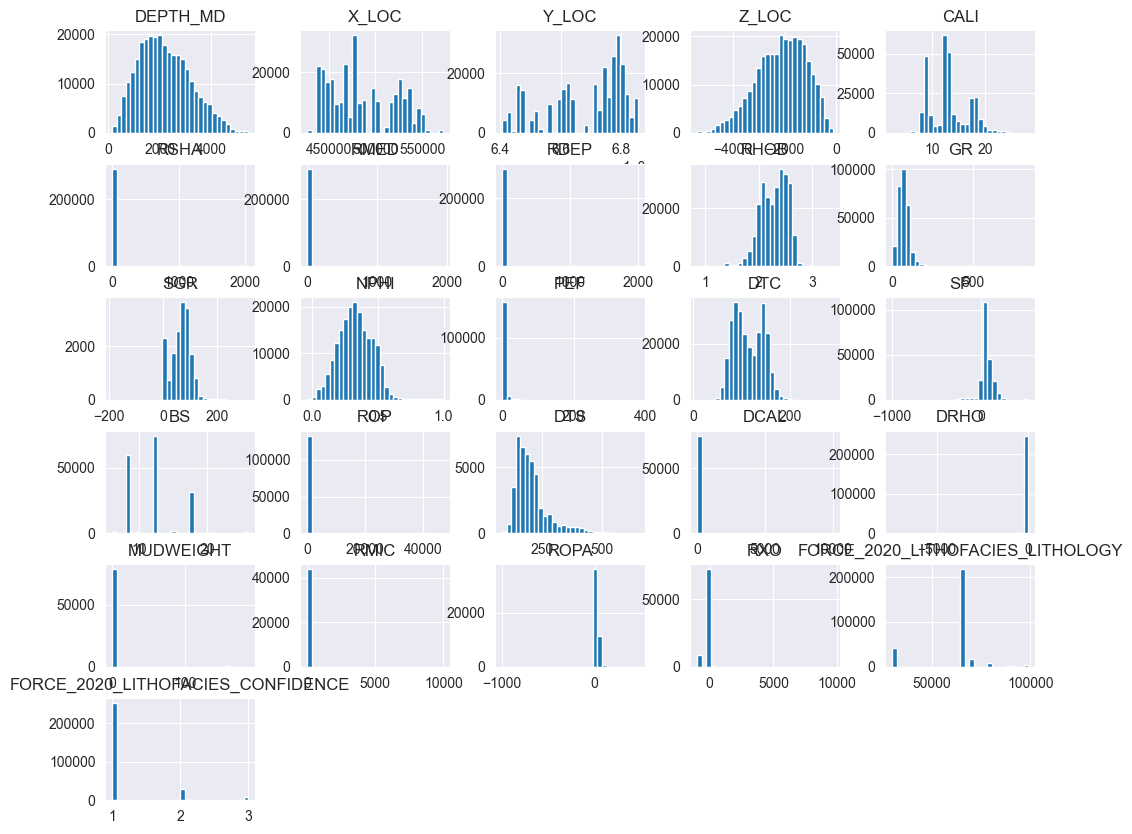

In [10]:
data.hist(figsize=(12, 10), bins=30)
plt.show()

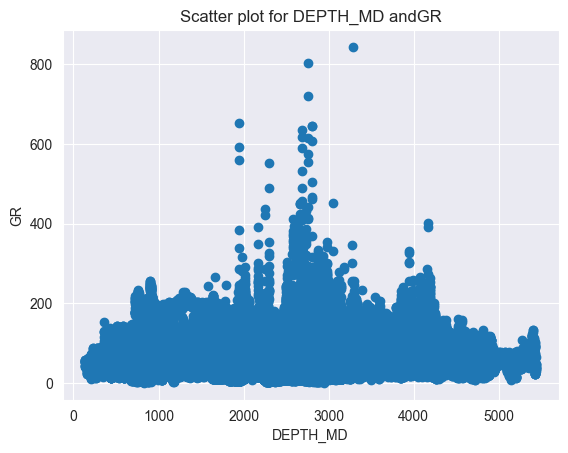

In [11]:
plt.scatter(data['DEPTH_MD'], data['GR'])
plt.xlabel('DEPTH_MD')
plt.ylabel('GR')
plt.title('Scatter plot for DEPTH_MD andGR')
plt.show()

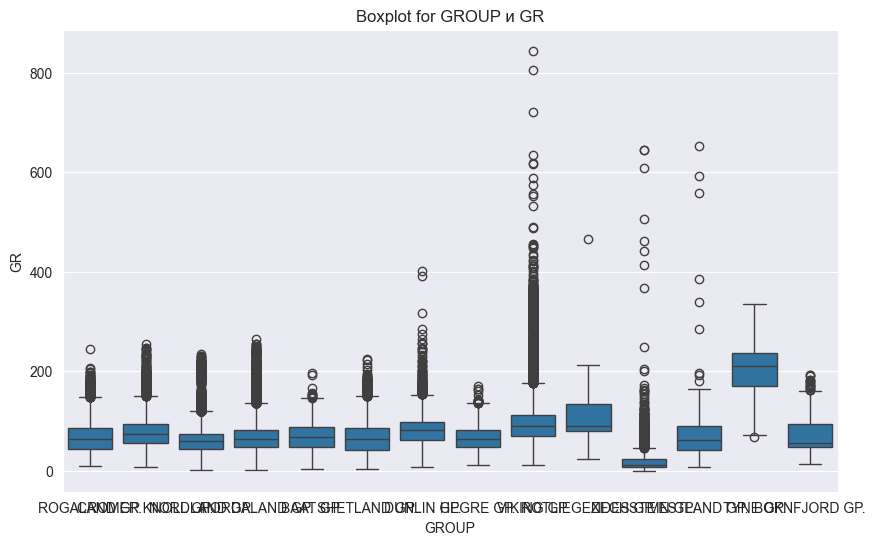

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GROUP', y='GR', data=data)
plt.title('Boxplot for GROUP и GR')
plt.show()

#### So also we have some outliers, so we need delete them

удаление строк с Z-оценкой выше порога 3 и удалились все строки в датасете

In [13]:
from scipy import stats

z_scores_gr = np.abs(stats.zscore(data['GR']))
data_no_outliers = data[(z_scores_gr < 3)]
data_no_outliers.shape


(288896, 29)

In [14]:
data_no_outliers

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-15,2343.304000,436806.46875,6463010.5,-2318.007324,ROGALAND GP.,Lista Fm.,14.882113,0.771240,0.771240,...,12.761565,NaN,2.632109,0.115312,0.143792,NaN,NaN,0.570850,65000,1.0
1,35/3-7 S,3582.467851,543919.75000,6856653.5,-3477.858154,CROMER KNOLL GP.,Roedby Fm.,8.645628,10.655559,5.599961,...,10.556081,150.206314,NaN,-0.007215,NaN,6.627153,10.410796,NaN,65000,1.0
2,25/9-1,734.814000,483545.34375,6590313.0,-709.762207,NORDLAND GP.,Utsira Fm.,13.183113,10.655559,5.041328,...,109.271744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65030,1.0
3,25/3-1,1075.968000,487291.25000,6643945.0,-1053.937988,HORDALAND GP.,Utsira Fm.,17.646826,10.655559,0.867609,...,7.970956,NaN,0.215513,0.051340,0.958611,NaN,NaN,NaN,30000,1.0
4,35/9-10 S,3580.061600,537897.75000,6791142.5,-3069.179688,BAAT GP.,Rannoch Fm.,8.572706,10.655559,7.634528,...,31.773550,140.671463,NaN,0.039784,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292623,16/7-5,2058.431985,446269.75000,6468389.5,-2031.546509,HORDALAND GP.,Skade Fm.,12.615398,0.567303,0.537278,...,5.950200,NaN,NaN,0.020284,1.126368,NaN,NaN,NaN,65000,2.0
292624,25/7-2,3029.760000,454816.71875,6571015.0,-3003.986084,SHETLAND GP.,Kyrre Fm.,13.617200,6.817722,3.079901,...,6.545644,NaN,1.367200,-0.003809,NaN,5.577710,NaN,5.546608,80000,1.0
292625,16/10-1,1738.407790,444152.00000,6435554.0,-1713.335327,HORDALAND GP.,Utsira Fm.,20.242147,10.655559,0.376177,...,66.677795,NaN,7.742147,-0.021147,0.152180,NaN,NaN,NaN,30000,3.0
292626,34/7-20,3145.718000,448303.84375,6812846.0,-3119.437012,HEGRE GP.,Lunde Fm.,13.117909,2.743335,1.202087,...,NaN,NaN,NaN,-0.009759,NaN,NaN,NaN,NaN,65000,2.0


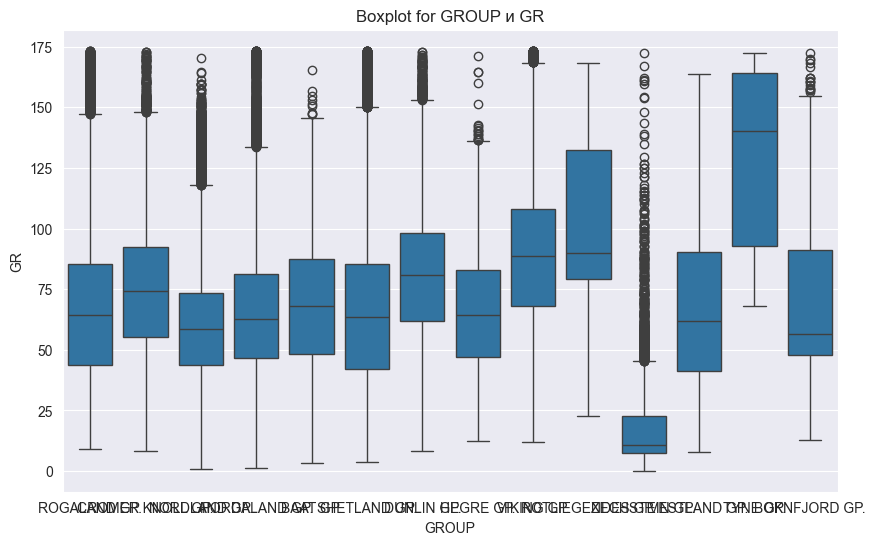

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GROUP', y='GR', data=data_no_outliers)
plt.title('Boxplot for GROUP и GR')
plt.show()

#### Стало более менее

## Creating Model's for comparing and choose the best one

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [17]:
features = ['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GR', 'RHOB', 'RSHA', 'RDEP', 'RMED', 'WELL', 'GROUP', 'FORMATION']
categorical_cols = ['WELL', 'GROUP', 'FORMATION']

## So cause we have categorical dat awe need encoding to numbers
label_enc = LabelEncoder()
for col in categorical_cols:
    data[col] = label_enc.fit_transform(data[col])

X = data[features]
y = data['FORCE_2020_LITHOFACIES_LITHOLOGY']

## Library for those what i did manually in previous task
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## I will be compare 2 model

In [18]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=13)
dt_model = DecisionTreeClassifier(random_state=13)

In [19]:
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")

## Effective to huge dataset and features
## Null values and outliers it's ot affect much
## Many Decision Tree to optimize and upgrade accuracy model

Random Forest Accuracy: 0.9352766291904453


In [20]:
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy}")

## Simple Model works well with the dataset which have Rules
## Help understand, which one of the features is affect to target

Decision Tree Accuracy: 0.8963366708813177


## Random Forest Accuracy: 0.9352766291904453
## Decision Tree Accuracy: 0.8963366708813177

In [22]:
from sklearn.metrics import classification_report
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

       30000       0.91      0.91      0.91      8362
       65000       0.95      0.98      0.96     35937
       65030       0.88      0.85      0.87      7559
       70000       0.92      0.76      0.83      2847
       70032       0.96      0.97      0.97       538
       74000       0.73      0.31      0.44        86
       80000       0.91      0.87      0.89      1724
       86000       0.88      0.94      0.91        64
       88000       0.99      0.99      0.99       437
       90000       0.85      0.63      0.73       208
       93000       1.00      1.00      1.00         6
       99000       0.94      0.95      0.94       758

    accuracy                           0.94     58526
   macro avg       0.91      0.85      0.87     58526
weighted avg       0.93      0.94      0.93     58526



In [23]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

       30000       0.86      0.86      0.86      8362
       65000       0.94      0.95      0.94     35937
       65030       0.79      0.79      0.79      7559
       70000       0.76      0.73      0.74      2847
       70032       0.94      0.92      0.93       538
       74000       0.38      0.31      0.34        86
       80000       0.84      0.81      0.82      1724
       86000       0.88      0.89      0.88        64
       88000       0.98      0.99      0.99       437
       90000       0.59      0.52      0.56       208
       93000       1.00      1.00      1.00         6
       99000       0.89      0.89      0.89       758

    accuracy                           0.90     58526
   macro avg       0.82      0.81      0.81     58526
weighted avg       0.90      0.90      0.90     58526

